# The Sequential model


Simply placing the Keras layers in a sequential order is the fundamental concept behind Sequential API, hence the name. The majority of ANNs also have layers that are arranged in sequential order, and data flows from one layer to the next in the designated order until it eventually reaches the output layer.

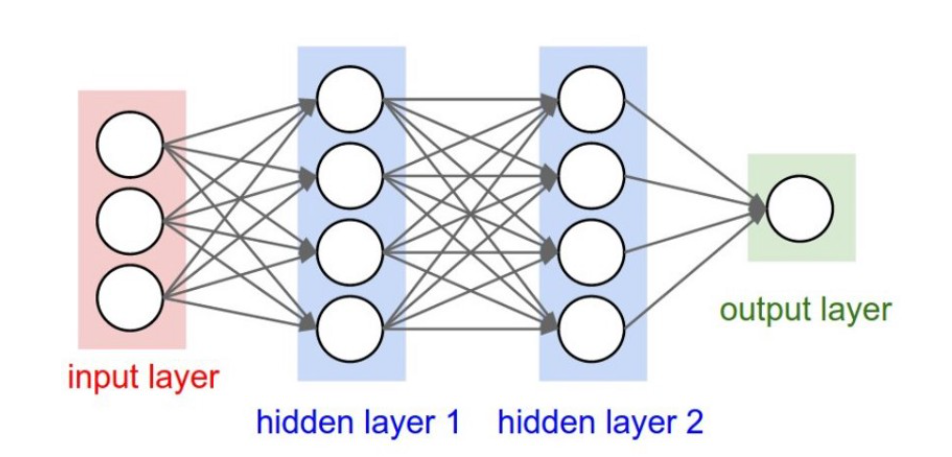

## Setup

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## When to use a Sequential model

For a simple stack of layers where each layer has precisely one input tensor and one output tensor, a sequential model is sufficient.

Schematically, the following `Sequential` model:

In [21]:
# Define Sequential model with 3 layers
model = keras.Sequential(                   #create a new sequential model using Sequential API
    [
        layers.Dense(4, activation="tanh", name="layer1"),   #adds a dense layer (Dense API) with 'tanh' activation (using Activation module) function.
        layers.Dense(2, activation="tanh", name="layer2"),
        layers.Dense(3, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

is equivalent to this function:

In [22]:
# Create 3 layers
layer1 = layers.Dense(4, activation="relu", name="layer1")
layer2 = layers.Dense(2, activation="relu", name="layer2")
layer3 = layers.Dense(3, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

A Sequential model is **not appropriate** when:

- Numerous inputs or multiple outputs are present in the model.
- Each layer has a number of inputs and outputs.
- when layer sharing is necessary

## Creating a Sequential model

A Sequential model can be created by passing a list of layers to the Sequential
constructor:

In [23]:
model = keras.Sequential(
    [
        layers.Dense(4, activation="tanh"),
        layers.Dense(2, activation="tanh"),
        layers.Dense(3),
    ]
)

## Layers
Each Keras layer in the Keras model represent the corresponding layer (input layer, hidden layer and output layer) in the actual proposed neural network model. Keras provides a lot of pre-build layers so that any complex neural network can be easily created.

**`layers` attribute can be used to access the layers of model:**

In [24]:
model.layers

New layers can be added to a Sequential model incrementally by using the `add()` method:

In [25]:
model = keras.Sequential()
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(2, activation="sigmoid"))
model.add(layers.Dense(2))

 `pop()` method can be used to remove layers:
a Sequential model behaves very much like a list of layers.

In [26]:
model.pop()
print(len(model.layers))  # 2

3


## Core Modules
Keras also provides a lot of built-in neural network related functions to properly create the Keras model and Keras layers. Some of the function are as follows −

**Activations module** − Activation function is an important concept in ANN and activation modules provides many activation function like softmax, relu, etc.,

**Loss module** − Loss module provides loss functions like mean_squared_error, mean_absolute_error etc.,

**Optimizer module** − Optimizer module provides optimizer function like adam, sgd, etc.,

**Regularizers** − Regularizer module provides functions like L1 regularizer, L2 regularizer, etc.,

Similar to every layer or model in Keras, the sequential constructor also accepts a "name" input.

In [27]:
model = keras.Sequential(name="my_model")
model.add(layers.Dense(2, activation="tanh", name="first"))
model.add(layers.Dense(3, activation="tanh", name="second"))
model.add(layers.Dense(4, name="third"))

## Specifying the input shape in advance

In order to be able to create their weights, all layers in Keras require knowledge of the shape of their inputs. Thus, when we establish a layer like this, it does not have any weights at first.:

In [28]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

It creates its weights the first time it is called on an input, since the shape
of the weights depends on the shape of the inputs:

In [29]:
# Call layer on a test input
x = tf.ones((1, 6))
y = layer(x)
layer.weights  # Now it has weights, of shape (6, 3) and (3,)

[<tf.Variable 'dense_22/kernel:0' shape=(6, 3) dtype=float32, numpy=
 array([[ 0.2765994 , -0.5005634 ,  0.01536107],
        [-0.00758702, -0.2390756 ,  0.40855122],
        [ 0.6165352 , -0.48421592, -0.7443614 ],
        [ 0.03321773, -0.3702688 ,  0.6290668 ],
        [-0.811779  ,  0.55126715,  0.38374043],
        [ 0.3730961 , -0.20462233,  0.29034412]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

Naturally, this also applies to Sequential models. A Sequential model is not "constructed" when it is created without an input shape because it lacks weights.(and calling
`model.weights` results in an error stating just this).Once the model sees some input data, the weights are automatically created.

In [30]:
model = keras.Sequential(
    [
        layers.Dense(8, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


Once a model is "built", you can call its `summary()` method to display its
contents:

In [31]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (1, 8)                    40        
                                                                 
 dense_24 (Dense)            (1, 8)                    72        
                                                                 
 dense_25 (Dense)            (1, 4)                    36        
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


However, being able to present the summary of the model thus far, together with the current output form, can be quite helpful when creating a Sequential model progressively. In this case, we should start our model by passing an `Input`
object to your model, so that it knows its input shape from the start:

In [32]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Note that the `Input` object is not displayed as part of `model.layers`, since
it isn't a layer:

In [33]:
model.layers

A simple alternative is to just pass an `input_shape` argument to our first
layer:

In [34]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="sigmoid", input_shape=(4,)))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Models built with a predefined input shape like this always have weights (even
before seeing any data) and always have a defined output shape.

In general, it's a recommended best practice to always specify the input shape
of a Sequential model in advance if you know what it is.

## A common debugging workflow: `add()` + `summary()`

When building a new Sequential architecture, frequently printing model summaary is very useful as it helps us to monitor how a stack of `Conv2D` and `MaxPooling2D` layers is
downsampling image feature maps.

In [17]:
model = keras.Sequential()
model.add(keras.Input(shape=(320, 320, 3)))  # 320x320 RGB images
model.add(layers.Conv2D(32, 4, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# We Probably not guess the current output at this point.

# But by printing model.summary() we can get the current output shape at this point.

model.summary()

# The answer was: (52 , 52 , 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# At last , we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 159, 159, 32)      1568      
                                                                 
 conv2d_7 (Conv2D)           (None, 157, 157, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                                 
Total params: 10,816
Trainable params: 10,816
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 159, 159, 32)      1568      
                            

In [36]:
model = keras.Sequential()
model.add(keras.Input(shape=(320, 320, 3))) 
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.summary()
# 320x320 RGB images


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 318, 318, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 106, 106, 32)     0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## What to do After we have created a model.

Once our model architecture is ready, we want to:

- Train our model, evaluate it, and run inference. 
- Save our model to disk and restore it. 
- Speed up model training by leveraging multiple GPUs. 

## Feature extraction with a Sequential model

After a Sequential model is being built, it behaves like a [Functional API
model](https://www.tensorflow.org/guide/keras/functional/). This means that every layer has an `input`
and `output` attribute. These attributes can be used to do neat things, like
quickly
creating a model that extracts the outputs of all intermediate layers in a
Sequential model:

In [18]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(320, 320, 3)),
        layers.Conv2D(32, 4, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 320, 320, 3))
features = feature_extractor(x)

Here's a similar example that only extract features from one layer:

In [19]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(320, 320, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_layer").output,
)
# Call feature extractor on test input.
x = tf.ones((1, 320, 320, 3))
features = feature_extractor(x)

**In the given cell, we will learn about how to do transfer learning with a sequential model. But as we do not have pretrained weights here we will not execute this script.
But when we will be doing CNN tutorials on the pretrained models like VGG 16, Alexnet, YOLO etc. We will have pretrained weights so we can implement in the same way as we are creating model here.**

## Transfer learning with a Sequential model

The bottom layers of a model are frozen, and only the top layers are trained during transfer learning.Tensorflow provides a guide on Transfer Learning. 
Here are two typical Sequential model transfer learning blueprints.

Let's start by imagining that we have a sequential model and that we wish to freeze all but the final layer. In this case, we would simply iterate over `model.layers` and set `layer.trainable = False` on each layer, except the
last one. Like this:

```python
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10),
])

# Presumably we would want to first load pre-trained weights.
model.load_weights(...)

#  Then we Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)
```

Another typical approach is to stack a pre-trained model with some newly initialised classification layers using a sequential model. Like this:

```python
# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

# Compile & train
model.compile(...)
model.fit(...)
```

When we will do transfer learning, we will probably find ourself frequently using
these two patterns.

## References:

- [Sequential Model Tensorflow Guide](https://www.tensorflow.org/guide/keras/sequential_model)
- [Sequential Model Keras ](https://keras.io/guides/sequential_model/)

To find out more about building models in Keras, see:

- [Guide to the Functional API](https://www.tensorflow.org/guide/keras/functional/)
- [Guide to making new Layers & Models via subclassing](
https://www.tensorflow.org/guide/keras/custom_layers_and_models/)